# Tarefa 2

Nessa tarefa você fará a implementação do forward pass e backpropagation pass para treinamento do método de geração de word-embeddings word2vec.

In [ ]:
# import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import re

Utilizaremos esse paragrafo para treinamento de nossos vetores de embeddings. Apesar de ser uma quantidade pequena de dados, é o suficiente para demonstração do funcionamento do método e traz o benefício de um treinamento rápido.

In [ ]:
text = '''Machine learning is the study of computer algorithms that \
improve automatically through experience. It is seen as a \
subset of artificial intelligence. Machine learning algorithms \
build a mathematical model based on sample data, known as \
training data, in order to make predictions or decisions without \
being explicitly programmed to do so. Machine learning algorithms \
are used in a wide variety of applications, such as email filtering \
and computer vision, where it is difficult or infeasible to develop \
conventional algorithms to perform the needed tasks.'''

A função abaixo faz a quebra do texto em tokens (elementos que formam o vocabulário do modelo), e os uniformiza para que contenham apenas letras minúsculas.

In [ ]:
# split the text into its smaller units: tokens
def tokenize(text):
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

Tarefa 2.1 (1 ponto): Escreva a função `mapping`, que recebe a lista de tokens presentes no texto de entrada do modelo (pode conter tokens repetidos), e dá como saída dois dicionários: `word_to_id` e `id_to_word`.

O dicionário `word_to_id` fará o mapeamento de um token do vocabulário para uma id única (a id deve ser um número inteiro, iniciando do 0), e o dicionário `id_to_word` fará o mapeamento contrário.

Dica: use a função `set` do python para remover tokens repetidos da lista recebida.

In [ ]:
# dictionaries mapping words to its indices
# and indices to words
# particularly useful to perform one-hot encoding
def mapping(tokens):
    # tokens: list with all tokens present in the input text
    # may contain repetitive words

    word_to_id = {}
    id_to_word = {}

    # TO DO (approx 3 lines)
    # Convert os tokens para um conjunto (set), eliminado assim itens repetidos
    # Intera por todos os tokens, retornando o índice e o token
    for i, token in enumerate(set(tokens)):
        # Chave é a palavra e o valor é o índice
        word_to_id[token] = i
        # Chave é o índice e o valor é o palavra
        id_to_word[i] = token
    # END TO DO

    return word_to_id, id_to_word

Tarefa 2.2 (1 ponto): Implemente a função `one_hot_encode`, que recebe como entrada o `id` de um token, e o tamanho do vocabulário. A função retorna um `hot_vector` do token respectivo àquele `id`.

O `hot_vector` deve ser uma lista do tamanho do vocabulário formada por zeros, exceto a posição `id`, que deve conter o valor 1.

In [ ]:
# one hot vectorize words
def one_hot_encode(id, vocab_size):
    # TO DO (approx 2 lines)
    # Cria um vetor de zeros do tamanho do vocabulário
    hot_vector = [0] * vocab_size
    # Seta a posição do id em 1
    hot_vector[id] = 1
    # END TO DO
    return hot_vector

A célula abaixo define as funções `concat` e `generate_training_data`, que fazem uso do dicionário `word_to_id` e da função `one_hot_encode` implementadas por você.

As funções `concat` e `generate_training_data` utilizam uma janela deslizante (sliding window) para gerar os dados de treinamento dos word-embeddings. A função `generate_training_data` retorna dois arrays:



*   X: shape: (número de exemplos, tamanho do vocabulário): cada exemplo é um one-hot vector representando o index da palavra central.
*   Y: shape: (número de exemplos, tamanho do vocabulário): cada exemplo é um one-hot vector representando o index da palavra contexto.


Rode a célula abaixo.

In [ ]:
# use asterisk * before the parameter name to pass variable length arguments.
def concat(*iterables):
    for iterable in iterables:
        yield from iterable

# use sliding window to generate x and y data
# x is the center word
# y is a context word within the window size


def generate_training_data(tokens, word_to_id, window):
    X = []
    y = []
    n_tokens = len(tokens)

    for i in range(n_tokens):
        idx = concat(
            range(max(0, i - window), i),
            range(i, min(n_tokens, i + window + 1))
        )

        for j in idx:
            if i == j:
                # center word == context word
                continue

            # one hot encode the center word
            X.append(one_hot_encode(word_to_id[tokens[i]], len(word_to_id)))
            # one hot encode the context word
            y.append(one_hot_encode(word_to_id[tokens[j]], len(word_to_id)))

    return np.asarray(X), np.asarray(y)

Tarefa 2.3 (1 ponto): Implemente a função de ativação softmax. Lembre que o array de saída da função softmax deve ter a mesma forma do array de entrada.

Dica: Implemente um loop para calcular individualmente o softmax para cada item do batch, e adicione o softmax calculado do item em uma lista. Após o loop, transforme essa lista em um numpy array e retorne ela. Exemplo:


```
def softmax(X):
  resultado = []
  for x in X:
    # calcular softmax de x
    resultado.append(softmax_de_x)

  return np.asarray(resultado)
```



In [ ]:
def softmax(X):
    # X: (batch_size, embedding_size, 1)

    # TO DO (approx 5 lines)
    resultado = []
    for x in X:
        exp = np.exp(x)
        resultado.append(exp / exp.sum())
    return np.asarray(resultado)
    # return something
    # TO DO

In [ ]:
# test the shapes outputted by your softmax function:
z = np.random.uniform(0, 1, (10, 60, 1))  # (batch_size, embed_size, 1)
y_hat = softmax(z)

print("[INFO] input shape to softmax: {}".format(z.shape))
print("[INFO] output shape to softmax: {}".format(y_hat.shape))

[INFO] input shape to softmax: (10, 60, 1)
[INFO] output shape to softmax: (10, 60, 1)


Tarefa 2.4 (1 ponto): Implemente a função de perda de Entropia Cruzada (Cross-Entropy) - função de perda do método word2vec demonstrada em aula (ver notebook aula 4, forward propagation Word2Vec).


Dica 1: Lembre de tirar a média do valor de perda de todos os exemplos do batch (dica: `np.average(something)`).


Dica 2: Para fazer o somatório dos resultados no eixo do `vocab_size`, você pode utilizar a função `np.sum(something, axis=1)`

![image.png](attachment:image.png)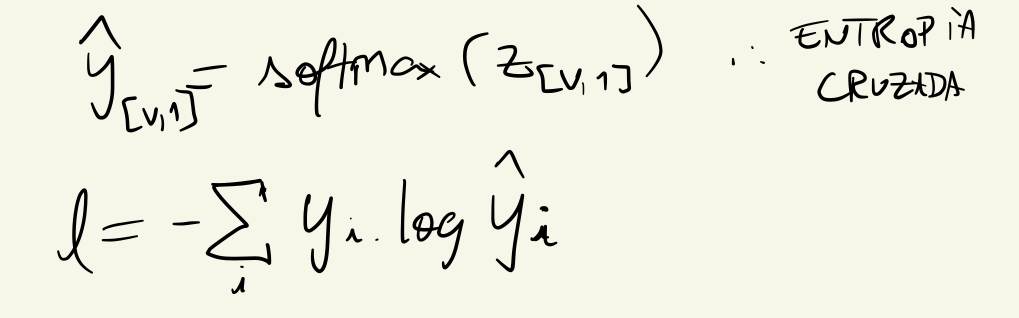

In [ ]:
#def cross_entropy(y_hat, y):
    #inputs:
#    y_hat: (batch_size, vocab_size, 1)
#    y: (batch_size, vocab_size, 1)

    #TO DO (approx 1 line)
#   return - np.sum(np.log(y_hat) * y)
    #TO DO


'''na aula o professor havia falado que não havia necessidade de fazer a média,
     então não estou muito certa a respeito dessa função'''

def cross_entropy(y_hat, y):
#   # inputs:
  y_hat: (batch_size, vocab_size, 1)
  y: (batch_size, vocab_size, 1)

#   # TO DO (approx 1 line)
#   #return something
#   # y_hat: Distribuição de probabilidade prevista (saída do SoftMax)
#   # y: Distribuição de probabilidade (one-hot vector)
  return -np.average(np.sum(y * np.log(y_hat), axis=1))
#   # TO DO

A função abaixo inicializa os pesos dos vetores de embeddings que iremos treinar.

Note que iremos treinar dois arrays de embeddings `wc` e `wo`. Lembre que cada palavra ou token é representando por dois vetores, um para quando o ele é a palavra central, e outro para quando o ele é a palavra contexto.

Assim, `wc` contém as representações dos tokens como palavras centrais, e `wo` contém as representações dos tokens como palavras contexto.

Rode a célula abaixo.

In [ ]:
def init_network(vocab_size, n_embedding):
    model = {
        "wc": np.random.randn(n_embedding, vocab_size),
        "wo": np.random.randn(vocab_size, n_embedding)
    }
    return model

A função `get_embedding` retorna o vetor de embeddings para um determinado token `word`. Note que o word-vector retornado é a média entre o vetor de embeddings do `token` quando está na posição central e quando está na posição contexto.

Rode a célula abaixo.

In [ ]:
def get_embedding(model, word):
    try:
        idx = word_to_id[word]
    except KeyError:
        print("token not in corpus")
    one_hot = one_hot_encode(idx, len(word_to_id))
    one_hot = np.reshape(np.asarray(one_hot), (1, -1, 1))

    # [emb_size, vocab_size]x[vocab_size, 1]
    word_center = np.squeeze(model["wc"] @ one_hot)
    # [1, vocab_size]x[vocab_size, emb_size]
    word_context = np.squeeze(np.moveaxis(one_hot, 1, -1) @ model["wo"])
    word_embedding = (word_center + word_context)/2

    return word_embedding

Tarefa 2.5 (1 ponto): Implemente a função `forward`, que implementa o passe de forward propagation de nossa rede neural. Você deve calcular os vetores `h`, `z` e `h_hat`, que serão armazenados no dicionário `cache`.

Dicas:


1.   Lembre que as matrizes com os word-embeddings para as palavras centrais e palavras contextos estão armazenadas no dicionário `model`: `model["wc"]` e `model["wo"]`.
2.   Multiplicação de matrizes pode ser realizada com o operador `@`.
3.  Para calculo do `y_hat`, utilize sua implementação do `softmax`.



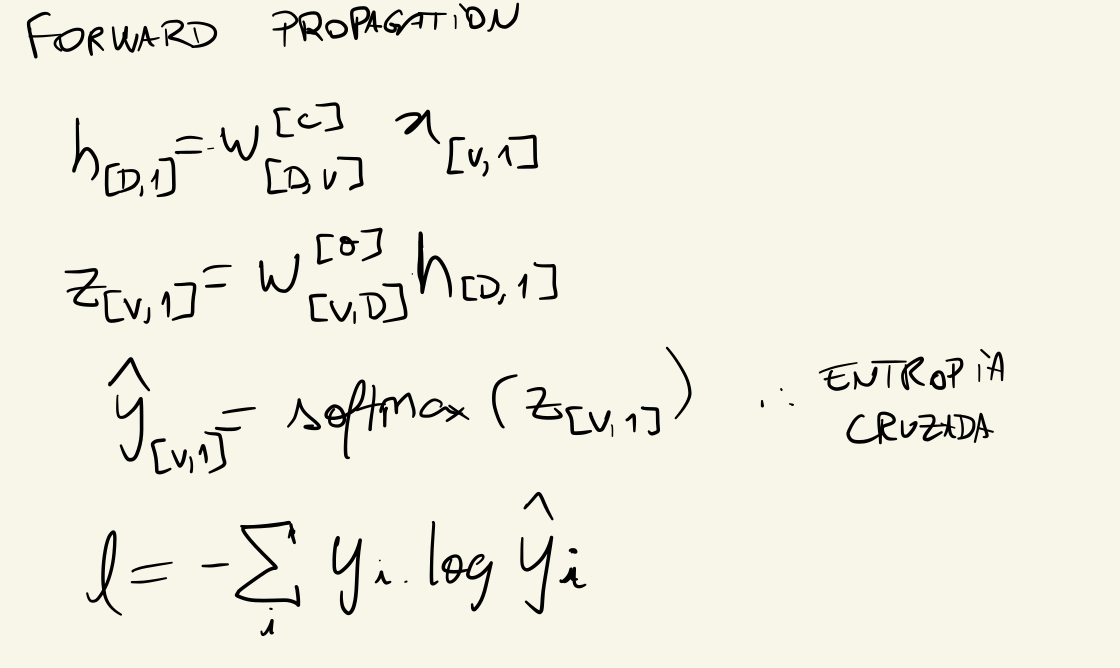

In [ ]:
def forward(model, X, return_cache=True):
    # inputs
    # model: dictionary containing the wc and wo weight matrices: model["wc"] and model["wo"]
    # X: array containing the input one-hot vectos. Shape: [batch_size, vocab_size, 1]

    cache = {}

    # TO DO STARTS HERE (approx 3 lines of code)
    # calculate h, z, and y_hat

    # TO DO ENDS HERE

    # store h, z and y_hat on the cache dictionary
    cache["h"] = model["wc"] @ X
    cache["z"] = model["wo"] @ cache["h"]
    cache["y_hat"] = softmax(cache["z"])

    if not return_cache:
        return cache["y_hat"]
    return cache

Tarefa 2.6 (2 ponto): Implemente a função `backward`, que implementa o backward pass de nosso modelo.

Antes da parte onde irá a sua implementação, o método `forward` é executado e retornará o dicionário `cache`. Esse dicionário conta com valores que você irá precisar para a backpropagation: `cache["y_hat"]`, `cache["h"]`. Outros valores que você irá precisar estão no dicionário `model`: `model["wo"]` e `model["wc"]`.

Dica:
1. Arrays como `cache["h"]` e `X` contam com sua primeira dimensão contendo o batch size. Exemplo: `X.shape = (batch_size, vocab_size, 1)`. Para fazer a operação de transposição das duas últimas dimensões, pode-se utilizar a função `np.moveaxis`. Por exemplo: `np.moveaxis(X, 1, -1)` transforma `X` de `(batch_size, vocab_size, 1)` para `(batch_size, 1, vocab_size)`.
2. Multiplicação de matrizes pode ser realizada com o operador `@`.

Dica 3: Note a seguinte correspondência dos símbolos vistos em aula, e a forma como estão escritos na célula abaixo:


```
Símbolo visto na aula -> Como está escrito na célula abaixo)
dl/dz (em aula) -> dz (na célula abaixo)
dl/dh (em aula) -> dh (na célula abaixo)
dl/dW[o] (em aula) -> dwo (na célula abaixo)
dl/dW[c] (em aula) -> dwc (na célula abaixo)
```




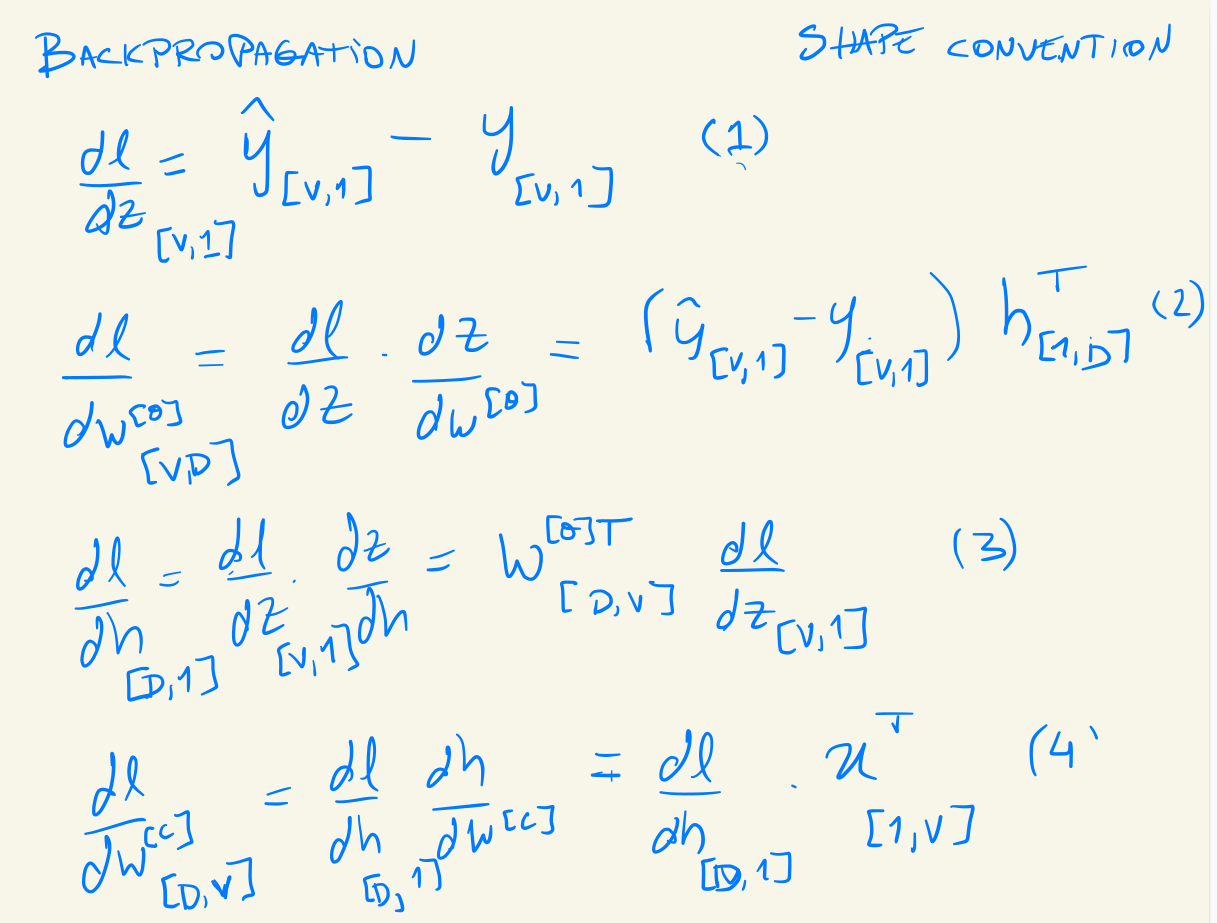

In [ ]:
def backward(model, X, y, alpha):
    # inputs
    # model: dictionary containing the wc and wo weight matrices: model["wc"] and model["wo"]
    # X: array containing the input one-hot vectos. Shape: [batch_size, vocab_size, 1]
    # y: array containing the true context words, used to compute the loss and the gradients: \
    #  Shape: [batch_size, vocab_size, 1]

    gradients = {
        "wo": np.zeros_like(model["wo"]),
        "wc": np.zeros_like(model["wc"]),
    }

    # run the forward pass
    cache = forward(model, X)

    # calculate the following derivatives with respect to the loss:
    # dz, dwo, dh and dwc
    # TO DO STARTS HERE (approx 4 lines of code)

    dz = cache["y_hat"] - y
    dwo = dz @ np.moveaxis(cache["h"], 1, -1)
    dh = model["wo"].T @ dz
    dwc = dh @ np.moveaxis(X, 1, -1)

    # TO DO ENDS HERE

    # take the average of the gradients for the batch
    gradients["wo"] = np.mean(dwo, axis=0)
    gradients["wc"] = np.mean(dwc, axis=0)

    assert (gradients["wo"].shape == model["wo"].shape)
    assert (gradients["wc"].shape == model["wc"].shape)

    # make a gradient descent step
    gradient_descent(model, gradients, alpha)

    return cross_entropy(cache["y_hat"], y)

Tarefa 2.7 (1 ponto): Implemente o método `gradient_descent`.

Faça a update dos tensores `model["wo"]` e `model["wc"]` utilizando a learning rate `alpha`e os gradientes `gradients["wo"]`e `gradients["wc"]`.

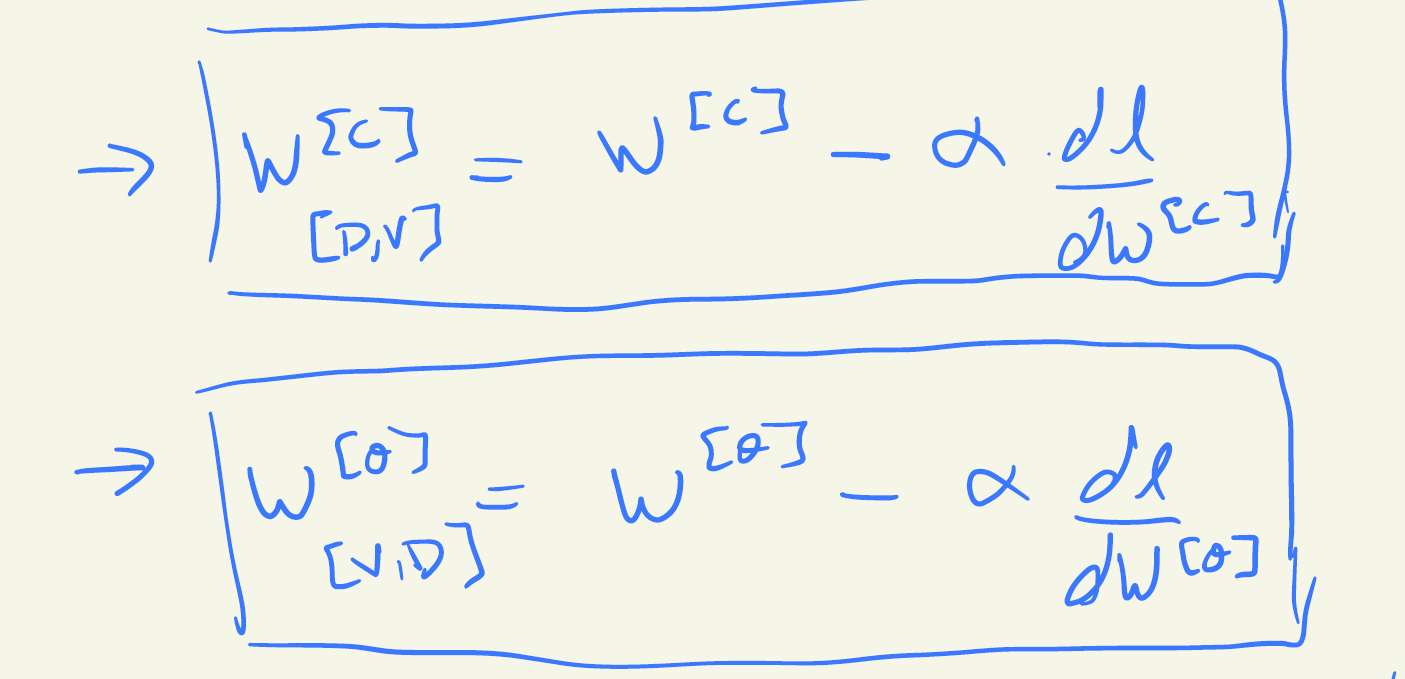

In [ ]:
def gradient_descent(model, gradients, alpha):
    # upgrade the model["wo"] and model["wc"] parameters
    # TO DO STATS HERE (approx 2 lines of code)
    model["wc"] -= alpha * gradients["wc"]
    model["wo"] -= alpha * gradients["wo"]
    # TO DO ENDS HERE

A célula seguinte utiliza tudo que foi implementado por você para fazer o treinamento de nossos word-embeddings por 1000 épocas.

A execução não deve durar mais que alguns minutos.

Note as dimensões que estamos utilizando:


*   Nosso vocabulário deve contar com apenas 60 palavras.
*   Estamos utilizando embeddings com dimensão 100.
*   Temos 330 exemplos que estamos utilizando para treinar nossa rede.
*   Estamos utilizando learning rate de 0.05.

Rode a célula.


In [ ]:
tokens = tokenize(text)  # return list of all tokens on the text
# return mappings from word to ids and vice-versa
word_to_id, id_to_word = mapping(tokens)
print("[INFO] our vocabulary size is: {}".format(len(word_to_id)))

X, y = generate_training_data(tokens, word_to_id, 2)

# initialize our model, with embedding size of 100
embed_dim = 100
model = init_network(len(word_to_id), embed_dim)
print("[INFO] shape of the array of center word vectors - wc: {}".format(model["wc"].shape))
print("[INFO] shape of the array of context word vectors - wo: {}".format(model["wo"].shape))

# expand the last dimension of the X and y arrays, so that we have
# [batch_size, vocab_size, 1]
X = np.expand_dims(X, axis=-1)
y = np.expand_dims(y, axis=-1)

print("[INFO] training data shape: {}".format(X.shape))
print("[INFO] label data shape: {}".format(y.shape))

n_iter = 1000

history = [backward(model, X, y, alpha=0.05) for _ in range(n_iter)]

[INFO] our vocabulary size is: 60
[INFO] shape of the array of center word vectors - wc: (100, 60)
[INFO] shape of the array of context word vectors - wo: (60, 100)
[INFO] training data shape: (330, 60, 1)
[INFO] label data shape: (330, 60, 1)


A célula seguinte faz o plot do nosso histórico de treinamento, mostrando a evolução de nossa perda. Cheque se seu plot confere com o plot que deveria ter sido obtido.

Rode a célula abaixo.

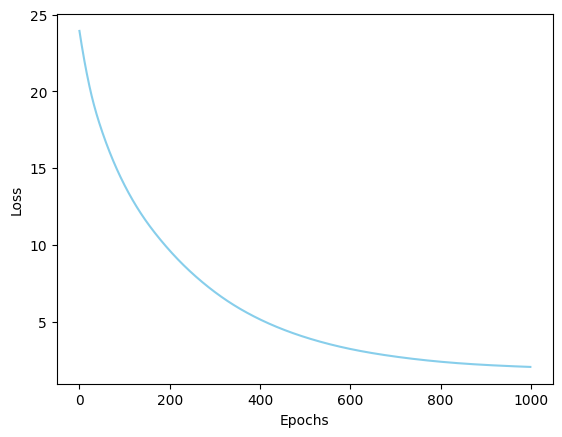

In [ ]:
plt.plot(range(len(history)), history, color="skyblue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Plot a ser obtido:

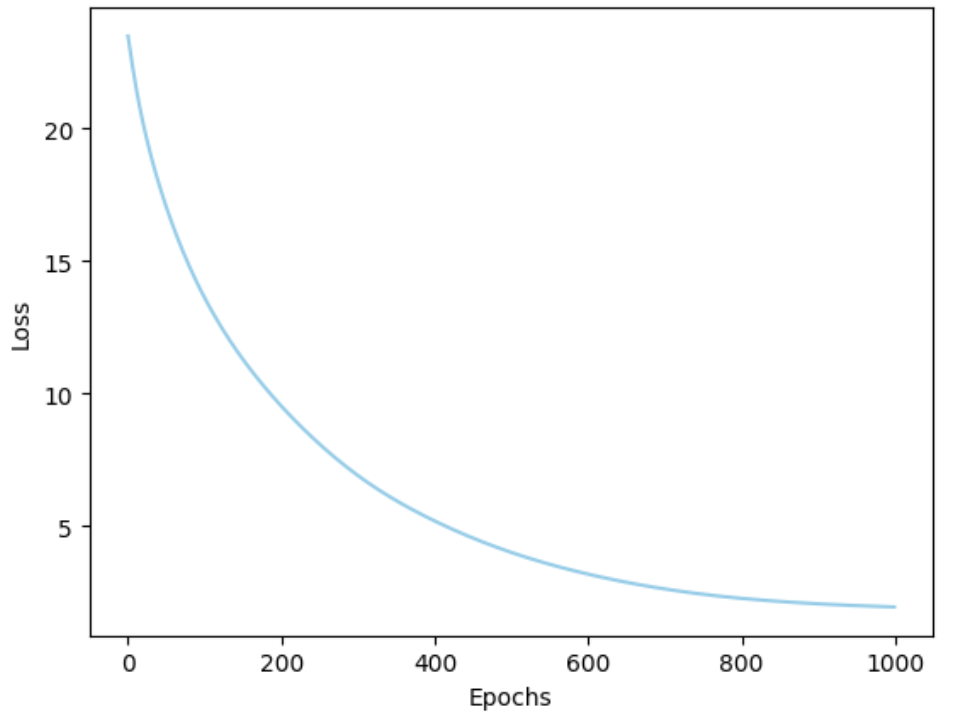

A célula abaixo contém o primeiro de dois testes de sanidade que faremos.

Primeiramente, fazemos o forward propagation em nossa rede a partir do one-hot vector da palavra central `learning`, e obtemos os tokens mais prováveis de aparecerem em sua redondeza.

Fazendo o `print` dos 10 tokens mais prováveis.

Rode a célula.

In [ ]:
# sanity check 1: check 10 words vectors that are more similar to the word vector of 'learning'
learning = one_hot_encode(word_to_id["learning"], len(word_to_id))
learning = np.reshape(np.asarray(learning), (1, -1, 1)
                      )  # [batch_size, vocab_size, 1]

# run forward pass
result = np.squeeze(forward(model, learning, return_cache=False))

for i, word in enumerate((id_to_word[id] for id in np.argsort(result)[::-1])):
    print(word)
    if i > 10:
        break

machine
algorithms
is
build
intelligence
the
are
so
of
known
computer
vision


No próximo teste de sanidade obtemos o vetor de embeddings da palavra `learning`, e calculamos a sua similaridade com os vetores de embeddings das palvras `machine`, `email` e `conventional`. O cálculo da similaridade é feito a partir do produto interno dos vetores.

In [ ]:
# sanity check 2: check the similarity between the word vectors of "learning" with
# the word vectors of "email" and "convetional" by taking the dot product of the vectors
learning = get_embedding(model, word='learning')
machine = get_embedding(model, word='machine')
email = get_embedding(model, word='email')
conventional = get_embedding(model, word='conventional')

print("similarity learning and machine:")
print(np.dot(learning, machine))
print("")
print("similarity learning and email:")
print(np.dot(learning, email))
print("")
print("similarity learning and conventional:")
print(np.dot(learning, conventional))

similarity learning and machine:
1.213915951799577

similarity learning and email:
-0.7805163138366285

similarity learning and conventional:
2.0311873618577376


Tarefa 2.8 (2 ponto): Avalie os resultados dos testes de sanidade 1 e 2:

1) O resultado das palavras mais próximas de "learning" no espaço dimensional dos word vectors gerados fazem sentido para você?

2) As distâncias obtidas entre os word vectors das palavras "learning", "email" e "conventional" estão de acordo com o esperado?

Discuta brevemente.

# to do
1- Sim. É um conjunto de substantivos, verbos, advérbios e adjetivos. É possível formar frases que façam sentido.

2- Sim. Pelo resultado do teste de sanidade a palavra "email" não aparece na llista gerada no algoritmo porque possivemente ela está longe da palavra learning (não significa q não possa aparecer como palavra contexto), já a palavra "conventional" tem uma poximidade maior, já que aparece na lista de palavras similares de learning.

# to do
